## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

## [ statsmodels 패키지의 API 관련 참고 ]

https://www.statsmodels.org/stable/api.html

회귀 등의 분석을 위해 `statsmodels.api` 와 `statsmodels.formula.api` 둘 다 사용 가능하지만 용법이 조금씩 다르며, `statsmodels.formula.api`와는 달리 `statsmodels.api`의 경우 회귀분석 수행 전에 상수항을 추가시키는 작업이 필요하다.

# 단순 회귀분석

In [2]:
df_sales = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Sales.csv',
                        index_col = 'Company')

df_sales

,Adver,Sales
Company,,
1,11,23
2,19,32
3,23,36
4,26,46
5,56,93
6,62,99
7,29,49
8,30,50
9,38,65


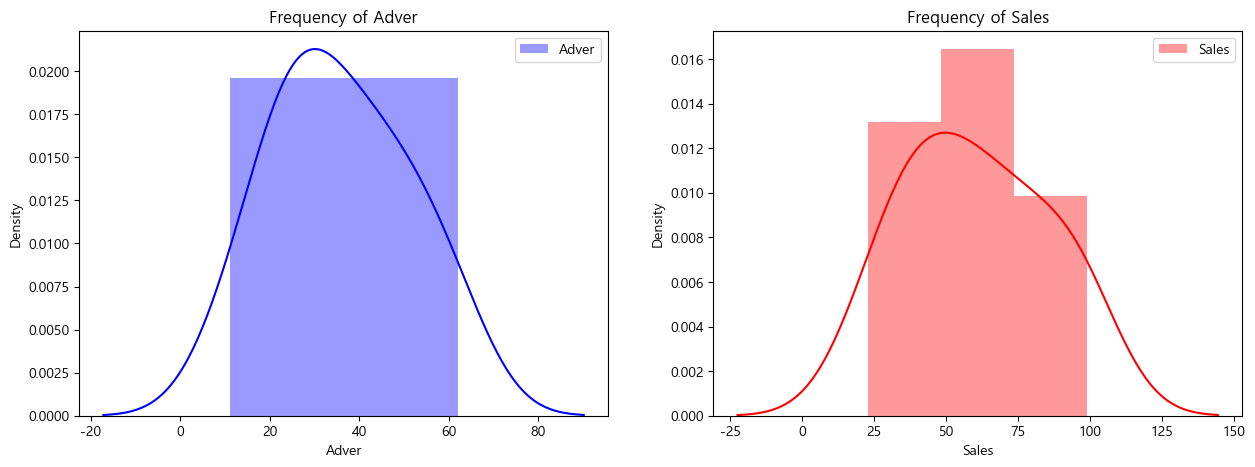

In [3]:
plt.figure( figsize = (15,5) )

ax1 = plt.subplot( 121 )
ax1 = sb.distplot( df_sales.Adver, label = 'Adver', color = 'blue' )
ax1.set( title = "Frequency of Adver")
plt.legend()

ax2 = plt.subplot( 122 )
ax2 = sb.distplot( df_sales.Sales, label = 'Sales', color = 'red'  )
ax2.set( title = "Frequency of Sales")
plt.legend()

plt.show()

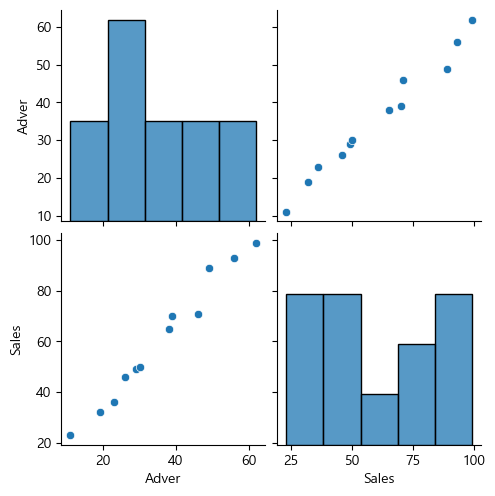

In [4]:
sb.pairplot( df_sales )

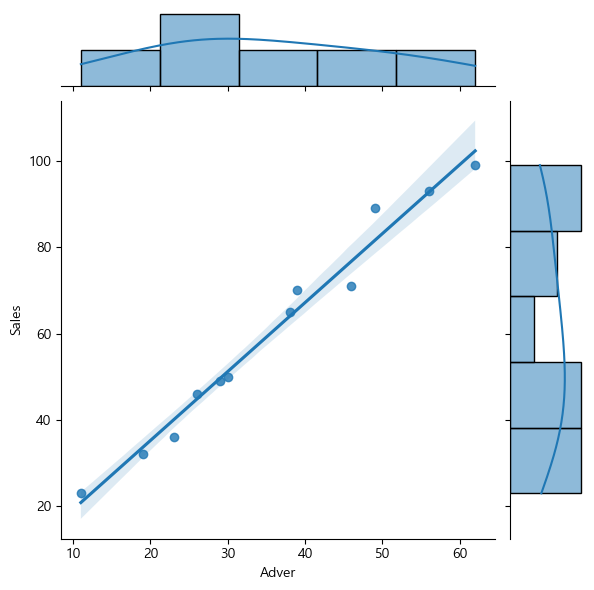

In [5]:
sb.jointplot( x = df_sales.Adver,
              y = df_sales.Sales,
              kind = 'reg' )

plt.show()

## 선형 회귀모델 생성 및 회귀분석

- 모델 생성  

`statsmodels.regression.linear_model.OLS( endog, exog=None, missing='none', hasconst=None, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

`statsmodels.formula.api.ols( formula, data, subset=None, drop_cols=None, *args, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html

- 모델 적합  
`model.fit(method='pinv', cov_type='nonrobust', cov_kwds=None, use_t=None, **kwargs)`  
Returns : `RegressionResults`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.fit.html

- 선형계수 출력  
`RegressionResults.params`

- 회귀 결과 요약  
`RegressionResults.summary( yname=None, xname=None, title=None, alpha=0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.summary.html

- 적합된 모델에 대한 분산분석표 출력  
`statsmodels.stats.anova.anova_lm( *args, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html

In [6]:
# statsmodels.formula.api.ols() 사용 시
# 상수항 추가작업 불필요.

y = df_sales.Sales
x = df_sales.Adver

model_sales = ols( formula = 'y ~ x', data = df_sales )

fit_sales = model_sales.fit()

print( fit_sales.params )
print()

print( fit_sales.summary(alpha = 0.05) )
print()

# ANOVA
anova_lm(fit_sales, test = 'F', typ = 1)

Intercept    3.284798
x            1.597155
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     455.5
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.14e-09
Time:                        01:46:02   Log-Likelihood:                -32.059
No. Observations:                  12   AIC:                             68.12
Df Residuals:                      10   BIC:                             69.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,6695.274575,6695.274575,455.537009,1.135673e-09
Residual,10.0,146.975425,14.697543,NaN,NaN


### 산점도와 회귀직선 출력

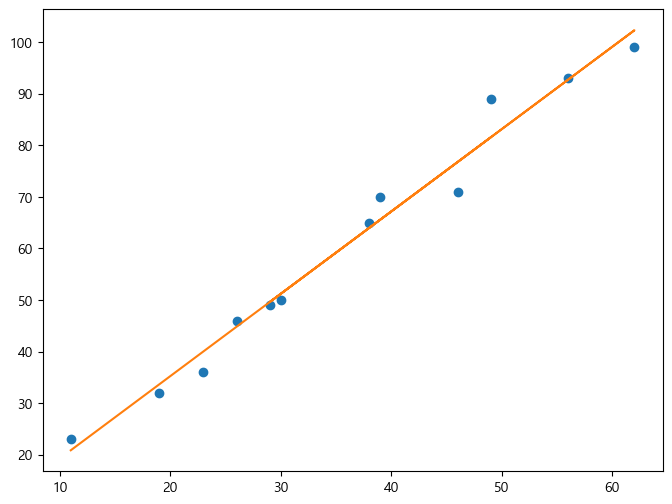

In [7]:
y_pred = fit_sales.predict()

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o')
ax.plot(x, y_pred )

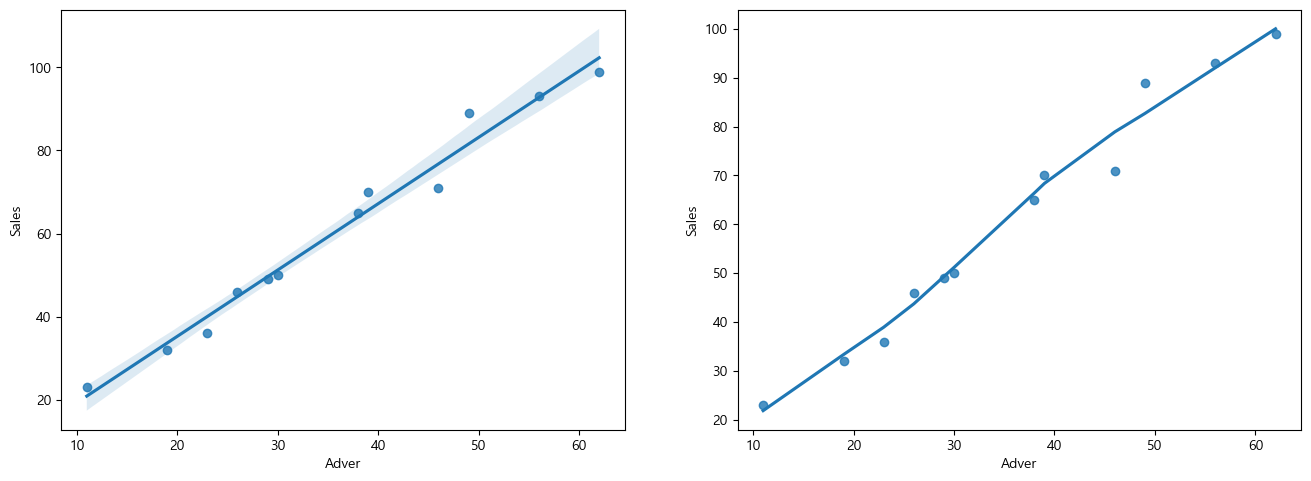

In [8]:
# 산점도와 회귀직선 출력

plt.figure(figsize=(16,12))

ax1 = plt.subplot(221)
ax1 = sb.regplot(x = 'Adver', y = 'Sales',
                 data = df_sales)

ax2 = plt.subplot(222)
ax2 = sb.regplot(x = 'Adver', y = 'Sales',
                 data = df_sales,
                 lowess = True)

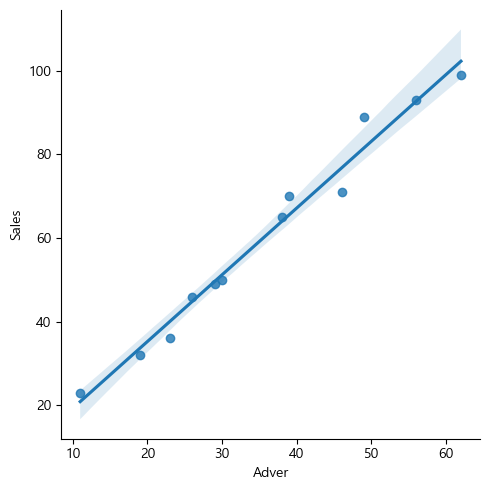

In [9]:
sb.lmplot(x = 'Adver', y = 'Sales', data = df_sales)

## 반응변수에 대한 예측

- 적합된 회귀 모델을 사용하여 예측  
`RegressionResults.predict( exog=None, transform=True, *args, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.predict.html

- 예측 결과를 계산  
`RegressionResults.get_prediction( exog=None, transform=True, weights=None, row_labels=None, **kwargs )`  
Returns : `PredictionResults`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.get_prediction.html

- 계산된 예측 결과를 데이터프레임으로 반환  
`PredictionResults.summary_frame( alpha=0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.summary_frame.html

- RMSE 출력  
`sklearn.metrics.mean_squared_error( y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [10]:
# 예측값
fit_sales.predict()

array([ 20.85350521,  33.63074676,  40.01936754,  44.81083312,
        92.72548895, 102.30842012,  49.6022987 ,  51.1994539 ,
        63.97669545,  65.57385065,  76.75393701,  81.54540259])

In [11]:
# 예측 결과 계산 및 출력

predictions = fit_sales.get_prediction()

predictions.summary_frame( alpha = 0.05 ).round(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
Company,,,,,,
1,20.854,2.152,16.058,25.649,11.057,30.650
2,33.631,1.667,29.916,37.346,24.316,42.946
3,40.019,1.457,36.773,43.266,30.881,49.158
4,44.811,1.322,41.865,47.757,35.775,53.847
5,92.725,1.881,88.533,96.918,83.210,102.241
6,102.308,2.260,97.273,107.344,92.392,112.224
7,49.602,1.214,46.897,52.307,40.642,58.562
8,51.199,1.185,48.559,53.840,42.258,60.140
9,63.977,1.120,61.480,66.473,55.077,72.876


In [12]:
# 생성한 회귀모델을 새로운 데이터에 적용하여 예측

# 반드시 컬럼 이름이 모델 적합에 사용한 fomular 와 일치해야 한다!!!
new_data = pd.DataFrame( { 'x' : [70,80,90,100] } )  

fit_sales.predict( new_data )

0    115.085662
1    131.057214
2    147.028766
3    163.000318
dtype: float64

In [13]:
new_pred = fit_sales.get_prediction( new_data )

new_pred.summary_frame( alpha = 0.05 ).round(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,115.086,2.797,108.853,121.319,104.511,125.660
1,131.057,3.497,123.265,138.850,119.495,142.620
2,147.029,4.214,137.640,156.418,134.336,159.722
3,163.000,4.940,151.994,174.007,149.068,176.933


In [14]:
# RMSE 계산
y_pred = fit_sales.predict()

mean_squared_error( y, y_pred, squared = False)

3.4997074336155922

## 잔차분석

### 표준화 잔차

- 모델의 잔차  
`RegressionResults.resid`

- 표준화 잔차  
`RegressionResults.resid_pearson`

In [15]:
# 예측값
y_pred = fit_sales.predict()

# 잔차
residual = fit_sales.resid

# 표준화 잔차
r_norm = fit_sales.resid_pearson

pd.DataFrame( { 'Predict' : y_pred,
                'Residual' : residual,
                'normalized Residual' : r_norm } ).round(3)

,Predict,Residual,normalized Residual
Company,,,
1,20.854,2.146,0.560
2,33.631,-1.631,-0.425
3,40.019,-4.019,-1.048
4,44.811,1.189,0.310
5,92.725,0.275,0.072
6,102.308,-3.308,-0.863
7,49.602,-0.602,-0.157
8,51.199,-1.199,-0.313
9,63.977,1.023,0.267


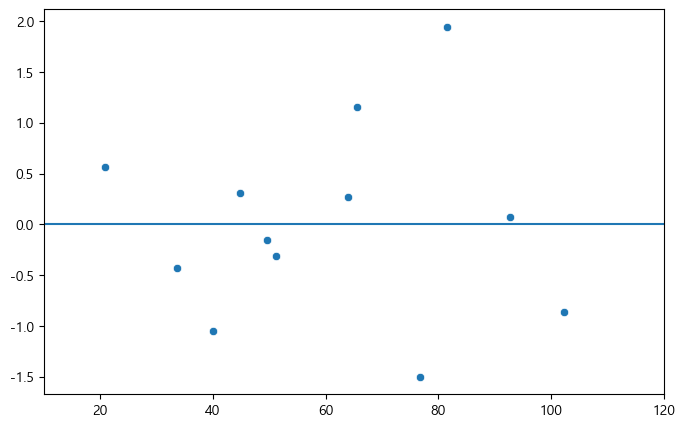

In [16]:
# 표준화잔차 vs. 적합값 도표 

fig, ax = plt.subplots( figsize = (8,5) )
sb.scatterplot( x = y_pred, y =r_norm )
ax.axhline(y=0)

plt.xlim(10, 120)
plt.show()

### 선형 회귀모형에서의 오차항에 대한 가정 검토

#### 잔차에 대한 정규성 검토

##### 히스토그램

<AxesSubplot:ylabel='Density'>

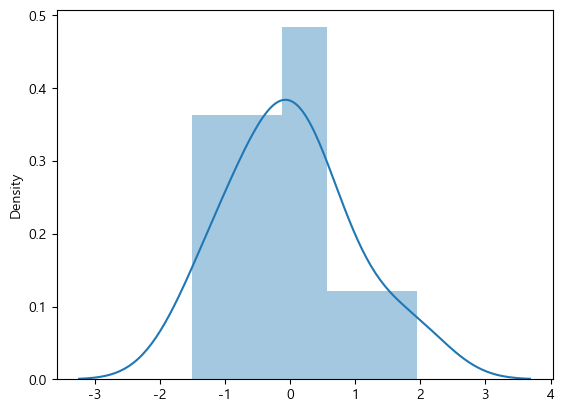

In [17]:
sb.distplot( r_norm )

##### Shapiro-Wilk normality test (n < 5000 일 경우)

- 자료 값들과 표준정규점수와의 선형상관 관계를 측정하여 검정하는 방법

- `scipy.stats.shapiro( x )`  
Returns : 'statistic', '.pvalue'  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [18]:
# Shapiro-Wilk normality test (n < 5000 일 경우)

result = stats.shapiro( residual )

print( f' Statistics: {result[0]:.4f} \n P-value: {result[1]:.28f}' )

if result[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if result[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

 Statistics: 0.9796 
 P-value: 0.9819798469543457031250000000
 p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.



##### Kolmogorov-Smirnov test  (n ≥ 5000 일 경우)

- 자료의 가장 작은 값부터 가장 큰 값까지의 누적상대빈도가 이론적 정규분포에서의 누적상대빈도와 얼마나 다른가를 측정하여 검정하는 방법

- `scipy.stats.kstest( rvs, cdf, args=(), N=20, alternative='two-sided', mode='auto' )`  
Returns : `statistic`, `pvalue`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [19]:
# statsmodels.stats.diagnostic.kstest_normal( x,
#                                             dist = 'norm',    # 가정된 분포
#                                             pvalmethod = 'table')  # 검정 통계량의 p-값을 계산하는데 사용되는 방법

result = kstest_normal(residual)
print( f' Statistics: {result[0]:.4f} \n P-value: {result[1]:.28f}' )

if result[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if result[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

 Statistics: 0.1225 
 P-value: 0.8852903586998075446956590895
 p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.



##### Anderson-Darling normality test (n ≥ 5000 일 경우)

- `scipy.stats.anderson( x, dist='norm' )`  
Returns : `.statistic`, `.critical_values`, `.significance_level`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

In [20]:
# Anderson-Darling normality test (n ≥ 5000 일 경우)

result = stats.anderson( residual, dist='norm' )

print( ' Statistics:', result.statistic.round(4), '\n',
       'critical values:', result.critical_values, '\n',
       'significance level:', result.significance_level )
print()

 Statistics: 0.1598 
 critical values: [0.497 0.566 0.679 0.792 0.942] 
 significance level: [15.  10.   5.   2.5  1. ]



##### Q-Q Plot

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([-1.50086884, -1.04842015, -0.86297515, -0.42536736, -0.31286804,
         -0.15710484,  0.07160403,  0.26692088,  0.31018475,  0.55989614,
          1.15452596,  1.94447261])),
 (1.0149301645279463, -7.696993776987073e-15, 0.9869321023876501))

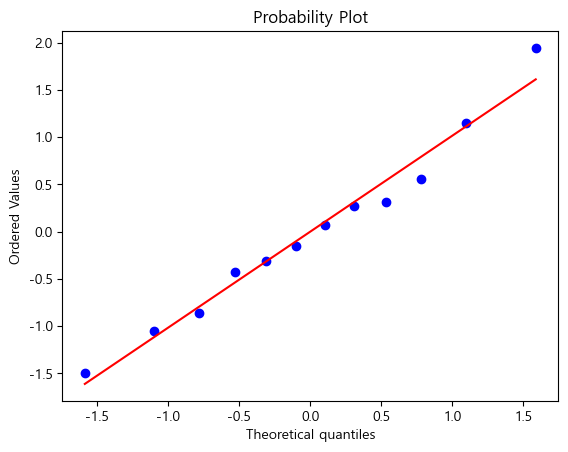

In [21]:
# Q-Q plot

stats.probplot( r_norm, plot = plt )

#### 오차항의 등분산성 검토

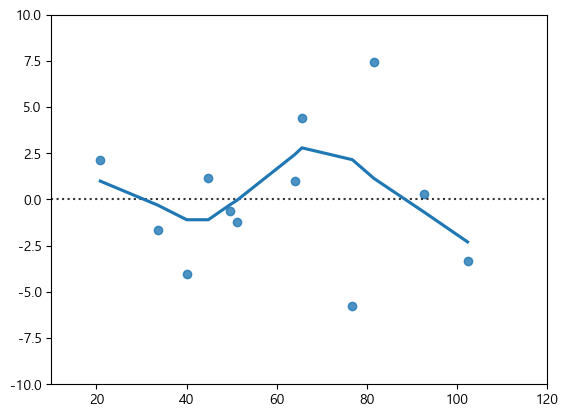

In [22]:
# 잔차의 등분산 확인
sb.residplot( x = y_pred, y = residual, lowess = True )
plt.xlim(10, 120)
plt.ylim(-10,10)
plt.show()

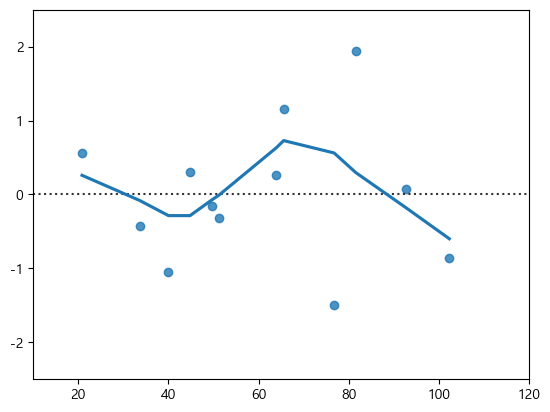

In [23]:
# 표준화 잔차의 등분산 확인
sb.residplot( x = y_pred, y = r_norm, lowess = True )
plt.xlim(10, 120)
plt.ylim(-2.5, 2.5)
plt.show()

#### 오차항의 독립성 검토

##### Durbin-Watson 통계량

- 2 에 가까우면 오차항의 독립성 만족,  
- 0 에 가까우면 양(+)의 자기상관관계,  
- 4 에 가까우면 음(-)의 자기상관관계

- `statsmodels.stats.stattools.durbin_watson( resids, axis=0 )` https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

- 회귀 결과 요약 `RegressionResults.summary()`의 Durbin-Watson 항목에서도 확인 가능.

In [24]:
# 더빈-왓슨 통계량

print('Durbin-Watson :', durbin_watson( r_norm ))

Durbin-Watson : 2.470311745748765


#### 회귀진단 결과 플로팅

- `statsmodels.graphics.regressionplots.plot_regress_exog(results, exog_idx, fig=None)` https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html

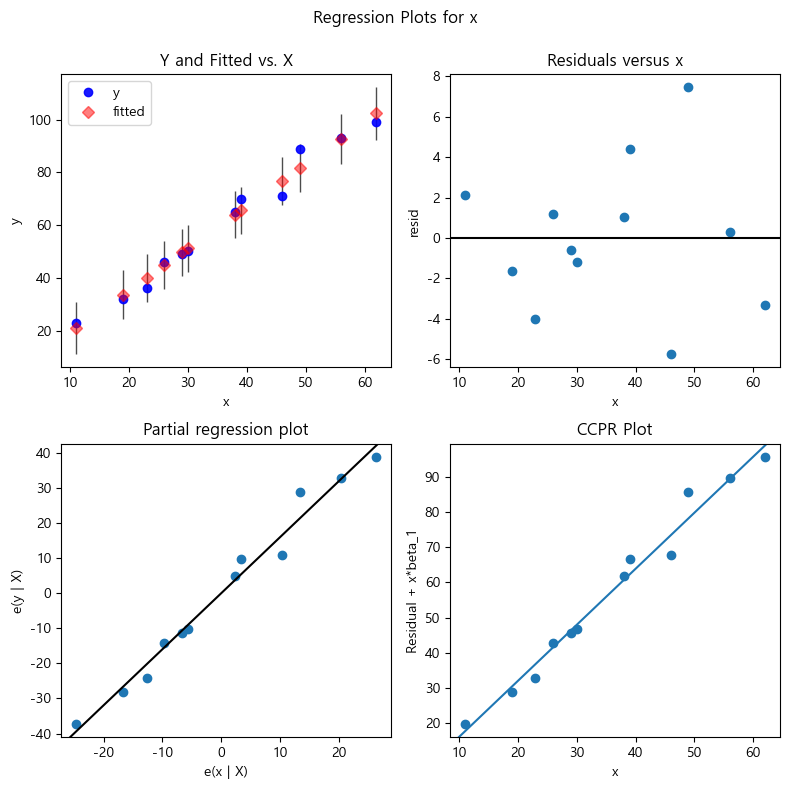

In [25]:
fig = plt.figure(figsize = (8, 8))

fig = plot_regress_exog( fit_sales, 'x', fig = fig)

# 다중 회귀분석

In [26]:
df_satisfaction = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Satisfaction.csv',
                            index_col = 'ID' )

df_stf = df_satisfaction.iloc[:, 0:5]
df_stf

,Y,X1,X2,X3,X4
ID,,,,,
1,5,5,5,6,5
2,5,5,5,5,5
3,5,5,6,5,5
4,5,6,6,5,6
5,5,5,6,5,5
...,...,...,...,...,...
696,3,4,5,6,4
697,4,3,3,3,5
698,5,6,6,5,6


In [27]:
# 상관계수 확인

df_stf.pairwise_corr(method='pearson').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Y,X1,pearson,two-sided,700,0.295,"[0.23, 0.36]",0.0,2.559e+12,1.0
1,Y,X2,pearson,two-sided,700,0.288,"[0.22, 0.35]",0.0,5.229e+11,1.0
2,Y,X3,pearson,two-sided,700,0.318,"[0.25, 0.38]",0.0,6.462e+14,1.0
3,Y,X4,pearson,two-sided,700,0.207,"[0.13, 0.28]",0.0,1.933e+05,1.0
4,X1,X2,pearson,two-sided,700,0.397,"[0.33, 0.46]",0.0,4.153e+24,1.0
5,X1,X3,pearson,two-sided,700,0.446,"[0.38, 0.5]",0.0,1.582e+32,1.0
6,X1,X4,pearson,two-sided,700,0.312,"[0.24, 0.38]",0.0,1.565e+14,1.0
7,X2,X3,pearson,two-sided,700,0.582,"[0.53, 0.63]",0.0,1.278e+61,1.0
8,X2,X4,pearson,two-sided,700,0.361,"[0.29, 0.42]",0.0,5.923e+19,1.0
9,X3,X4,pearson,two-sided,700,0.430,"[0.37, 0.49]",0.0,3.257e+29,1.0


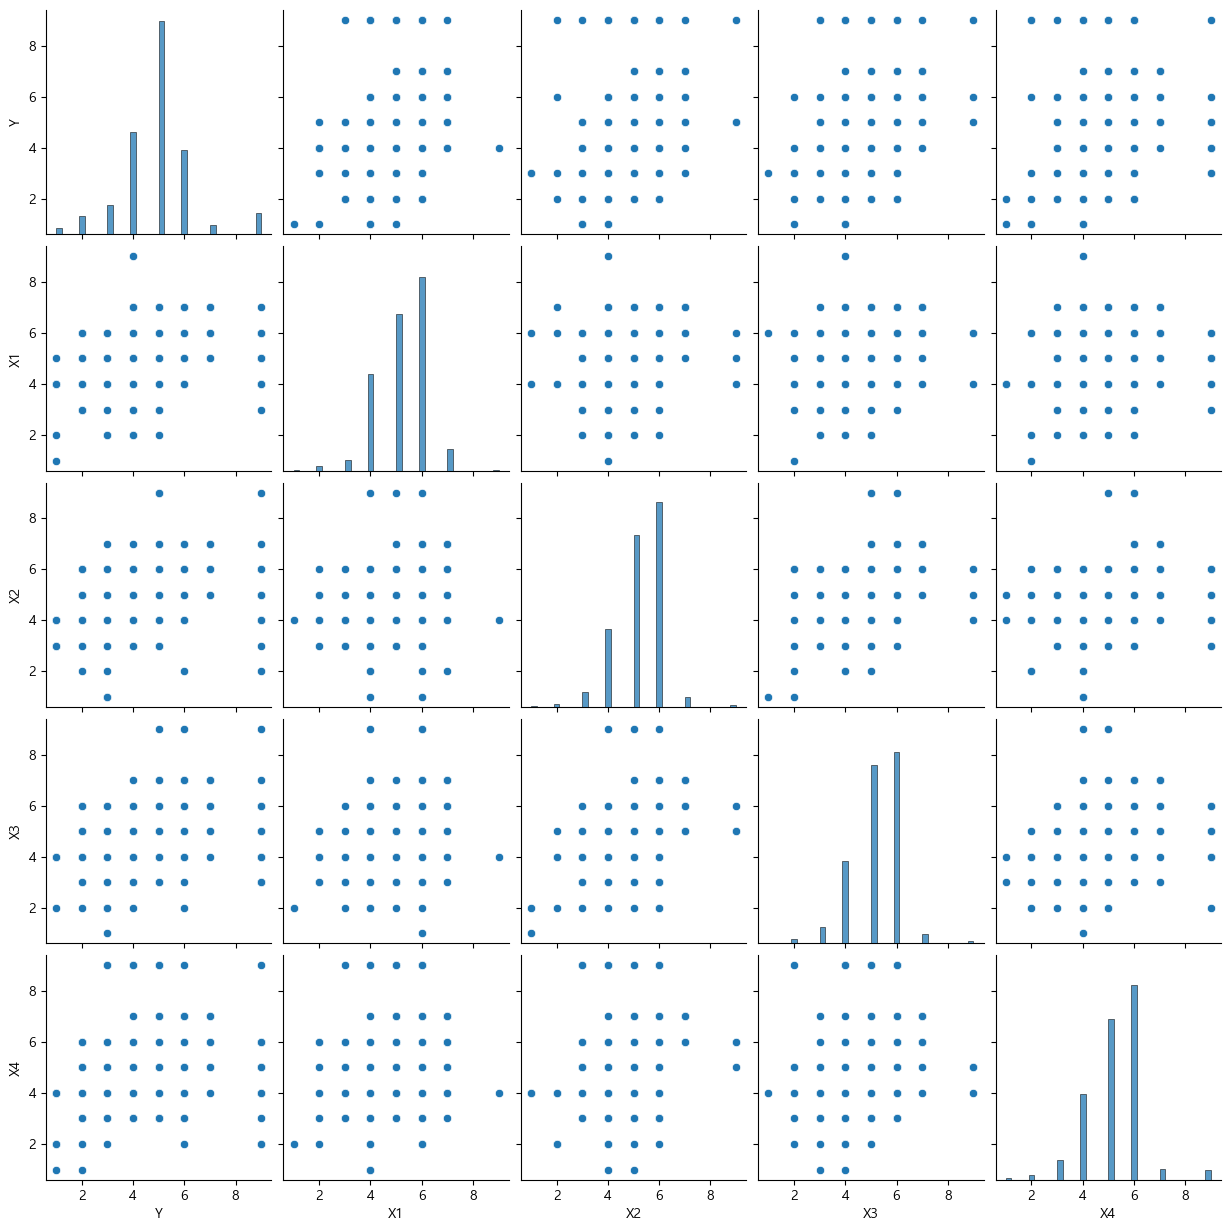

In [28]:
# 산점도 확인
sb.pairplot( df_stf )

## 다중 회귀모델 생성 및 회귀분석

- y = α + β1·x1 + β2·x2 + ... + βp·xp + ε

- 귀무가설 H0 : β1 = β2 = ... = βp = 0
- 대립가설 H1 : β1 ~ βp 중 적어도 하나 이상의 계수는 0 이 아니다.

In [29]:
model_stf = ols( data = df_stf, formula = 'Y ~ X1+X2+X3+X4')

fit_stf = model_stf.fit()

print( fit_stf.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     28.56
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           5.38e-22
Time:                        01:46:11   Log-Likelihood:                -1174.4
No. Observations:                 700   AIC:                             2359.
Df Residuals:                     695   BIC:                             2382.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2918      0.347      3.719      0.0

In [30]:
# 적합된 모델에 대한 분산분석표 확인

anova_lm( fit_stf, test = 'F', typ = 1).round(4)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,118.7986,118.7986,70.2889,0.0000
X2,1.0,47.2047,47.2047,27.9294,0.0000
X3,1.0,24.7888,24.7888,14.6667,0.0001
X4,1.0,2.3047,2.3047,1.3636,0.2433
Residual,695.0,1174.6518,1.6901,NaN,NaN


## 표준화 회귀계수

- Z값 계산  
`scipy.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate')`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

In [31]:
df_stf_z = df_stf.iloc[:, 0:5].apply(stats.zscore)
df_stf_z

,Y,X1,X2,X3,X4
ID,,,,,
1,0.077671,-0.223819,-0.241429,0.854490,-0.203835
2,0.077671,-0.223819,-0.241429,-0.182153,-0.203835
3,0.077671,-0.223819,0.814822,-0.182153,-0.203835
4,0.077671,0.800191,0.814822,-0.182153,0.699232
5,0.077671,-0.223819,0.814822,-0.182153,-0.203835
...,...,...,...,...,...
696,-1.353118,-1.247830,-0.241429,0.854490,-1.106902
697,-0.637724,-2.271840,-2.353929,-2.255440,-0.203835
698,0.077671,0.800191,0.814822,-0.182153,0.699232


In [32]:
model_stf_z = ols( data = df_stf_z,
               formula = 'Y ~ X1+X2+X3+X4')

fit_stf_z = model_stf_z.fit()

fit_stf_z.params.round(4)

Intercept    0.0000
X1           0.1643
X2           0.1128
X3           0.1594
X4           0.0463
dtype: float64

In [33]:
print( fit_stf_z.summary() )
print()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     28.56
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           5.38e-22
Time:                        01:46:11   Log-Likelihood:                -939.99
No. Observations:                 700   AIC:                             1890.
Df Residuals:                     695   BIC:                             1913.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.857e-17      0.035   1.38e-15      1.0

## 변수 선택

### 변수별 추정계수의 p값 확인

In [34]:
# X4 의 p값이 0.243 으로 유의수준 5% 보다 크므로 반응변수를 설명하는데 유의하지 않으므로 제거 

model_2_stf = ols( data = df_stf, formula = 'Y ~ X1+X2+X3')

fit_2_stf = model_2_stf.fit()

print( fit_2_stf.summary() )
print()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.56e-22
Time:                        01:46:11   Log-Likelihood:                -1175.1
No. Observations:                 700   AIC:                             2358.
Df Residuals:                     696   BIC:                             2376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4020      0.334      4.193      0.0

In [35]:
anova_lm( fit_2_stf, test = 'F', typ = 1).round(4)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,118.7986,118.7986,70.2522,0.0000
X2,1.0,47.2047,47.2047,27.9148,0.0000
X3,1.0,24.7888,24.7888,14.6590,0.0001
Residual,696.0,1176.9565,1.6910,NaN,NaN


### 단계적 변수 선택법

- `mlxtend.feature_selection` 패키지 사용 (sklearn으로 생성된 모델 적용 필요)

-

- `SequentialFeatureSelector( estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2n_jobs', clone_estimator=True, fixed_features=None )`  
https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

1.  변수선택 방법은 `forward`, `floating` 파라미터로 설정  
전진 선택법(sfs) : forward = True, floating = False  
후진 제거법(sbs) : forward = False, floating = False  
단계적 방법(sffs) : forward = True, floating = True  
단계적 방법(sbfs) : forward = False, floating = True  

2. 변수선택(모형선택) 기준은 `scoring` 파라미터로 설정  
회귀 모델의 경우 : { `neg_mean_absolute_error`, `neg_mean_squared_error`, `neg_median_absolute_error`, `r2` }   
분류 모델의 경우 { `accuracy`, `f1`, `precision`, `recall`, `roc_auc` }

-

- `plot_sequential_feature_selection( metric_dict, figsize=None, kind='std_dev', color='blue', bcolor='steelblue', marker='o', alpha=0.2, ylabel='Performance', confidence_interval=0.95 )`  
https://rasbt.github.io/mlxtend/user_guide/plotting/plot_sequential_feature_selection/

In [36]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [37]:
df_stf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       700 non-null    int64
 1   X1      700 non-null    int64
 2   X2      700 non-null    int64
 3   X3      700 non-null    int64
 4   X4      700 non-null    int64
dtypes: int64(5)
memory usage: 49.0 KB


In [38]:
x = df_stf.iloc[:, 1:5]
y = df_stf.iloc[:, 0]

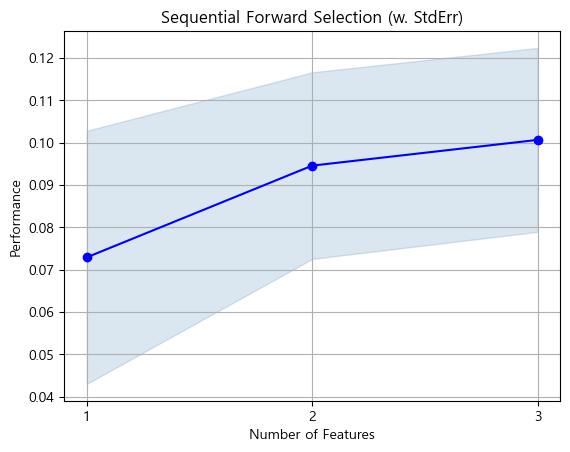

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.11172850107588017, -0.044981548476835886, 0...",0.072914,"(X3,)",0.06898,0.079143,0.029913
2,"(0, 2)","[0.1577155312694588, -0.015314072761265729, 0....",0.094592,"(X1, X3)",0.050841,0.058332,0.022047
3,"(0, 1, 2)","[0.17283151202506442, 0.005716935434273873, 0....",0.100678,"(X1, X2, X3)",0.050122,0.057507,0.021736


In [39]:
# 사이킷런으로 선형회귀모델 생성
lr = LinearRegression()

# mlxtend.feature_selection 의 SequentialFeatureSelector 적용
sffs = SFS( lr,
            k_features=3,  # 변수의 개수 선택
            forward=True, floating=True,  # 단계적 선택법을 하되 Top Down 방향으로...
            scoring='r2',  # 선택 기준은 R-square
            cv = 8,  # 교차검증은 8-fold
            n_jobs=-1 )  # 연산할 때 모든 CPU 코어 사용

sffs.fit(x,y)

fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sffs.get_metric_dict()).T

In [40]:
model_2_stf = ols( data = df_stf, formula = 'Y ~ X1+X2+X3')

fit_2_stf = model_2_stf.fit()

print( fit_2_stf.summary() )
print()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.56e-22
Time:                        01:46:22   Log-Likelihood:                -1175.1
No. Observations:                 700   AIC:                             2358.
Df Residuals:                     696   BIC:                             2376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4020      0.334      4.193      0.0

## 다중공선성

In [41]:
df_multico = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\Multico.csv',
                         index_col = 'ID')

df_multico

,Y,X1,X2,X3,X4
ID,,,,,
1,4.0,4.0,4.0,4.0,4.0
2,4.0,4.0,4.0,3.0,3.5
3,4.0,4.0,3.0,4.5,4.0
4,4.0,4.0,4.0,3.0,3.5
5,5.0,5.0,5.0,4.0,4.5
6,4.0,4.0,5.0,3.0,3.5
7,4.0,4.0,4.0,3.0,3.5
8,5.0,5.0,4.0,4.0,4.5
9,4.0,4.0,4.0,3.5,4.0


In [42]:
model_mtc = ols( data = df_multico, formula = 'Y ~ X1+X2+X3+X4')

fit_mtc = model_mtc.fit()

print( fit_mtc.summary() )
print()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     4.404
Date:                Fri, 10 Sep 2021   Prob (F-statistic):             0.0149
Time:                        01:46:22   Log-Likelihood:                -5.8055
No. Observations:                  20   AIC:                             21.61
Df Residuals:                      15   BIC:                             26.59
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1511      0.858      1.341      0.2

In [43]:
# 분산분석 F-test
anova_lm( fit_mtc, test = 'F', typ = 1).round(4)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,1.9184,1.9184,13.7516,0.0021
X2,1.0,0.0255,0.0255,0.1829,0.6750
X3,1.0,0.4839,0.4839,3.4686,0.0822
X4,1.0,0.0296,0.0296,0.2120,0.6518
Residual,15.0,2.0926,0.1395,NaN,NaN


### 다중공선성의 진단

#### 상관계수

In [44]:
df_multico.pairwise_corr()

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Y,X1,pearson,two-sided,20,0.649331,"[0.29, 0.85]",1.947543e-03,24.253,0.902509
1,Y,X2,pearson,two-sided,20,0.165748,"[-0.3, 0.57]",4.849427e-01,0.348,0.107835
2,Y,X3,pearson,two-sided,20,0.501832,"[0.08, 0.77]",2.416338e-02,2.975,0.641721
3,Y,X4,pearson,two-sided,20,0.670358,"[0.32, 0.86]",1.218921e-03,36.18,0.926730
4,X1,X2,pearson,two-sided,20,0.362738,"[-0.1, 0.69]",1.159856e-01,0.879,0.359579
5,X1,X3,pearson,two-sided,20,0.312641,"[-0.15, 0.66]",1.795702e-01,0.643,0.275109
6,X1,X4,pearson,two-sided,20,0.686210,"[0.35, 0.87]",8.353890e-04,50.019,0.942331
7,X2,X3,pearson,two-sided,20,0.220998,"[-0.25, 0.6]",3.490963e-01,0.417,0.156612
8,X2,X4,pearson,two-sided,20,0.407705,"[-0.04, 0.72]",7.436289e-02,1.227,0.445434
9,X3,X4,pearson,two-sided,20,0.879395,"[0.72, 0.95]",3.283794e-07,4.771e+04,0.999925


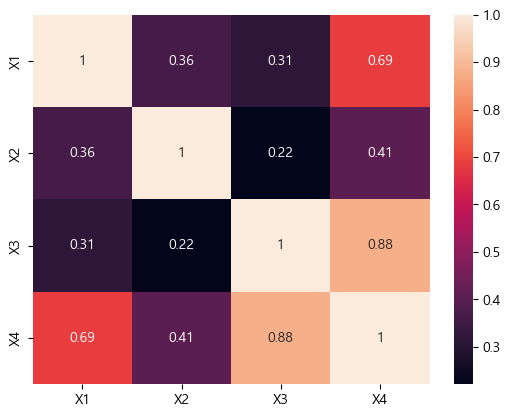

In [45]:
sb.heatmap(df_multico.iloc[:, 1:].corr(), annot = True)
print()

#### VIF (분산확대인자)

- `statsmodels.stats.outliers_influence.variance_inflation_factor( exog, exog_idx )`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

- 10보다 크면(즉, 해당 변수의 변이가 다른 설명변수들에 의해서 90% 이상 설명이 되면) 다중공선성이 심각한 것으로 간주한다.

In [46]:
# 설명변수들의 이름

model_mtc.exog_names

['Intercept', 'X1', 'X2', 'X3', 'X4']

In [47]:
for i, column in enumerate(model_mtc.exog_names):
    print( i, column )

0 Intercept
1 X1
2 X2
3 X3
4 X4


In [48]:
# 설명변수들에 대한 데이터 배열

model_mtc.exog

array([[1. , 4. , 4. , 4. , 4. ],
       [1. , 4. , 4. , 3. , 3.5],
       [1. , 4. , 3. , 4.5, 4. ],
       [1. , 4. , 4. , 3. , 3.5],
       [1. , 5. , 5. , 4. , 4.5],
       [1. , 4. , 5. , 3. , 3.5],
       [1. , 4. , 4. , 3. , 3.5],
       [1. , 5. , 4. , 4. , 4.5],
       [1. , 4. , 4. , 3.5, 4. ],
       [1. , 4. , 5. , 3. , 3.5],
       [1. , 4. , 4. , 3. , 3.5],
       [1. , 3. , 3. , 3. , 3. ],
       [1. , 4. , 4. , 4. , 4. ],
       [1. , 4. , 4. , 3. , 3.5],
       [1. , 4. , 4. , 3. , 3.5],
       [1. , 4. , 3. , 2.5, 3. ],
       [1. , 4. , 3. , 3. , 3.5],
       [1. , 4. , 5. , 5. , 4.5],
       [1. , 4. , 4. , 5. , 4.5],
       [1. , 5. , 4. , 4. , 4.5]])

In [49]:
# 분산확대인자 출력

print( variance_inflation_factor( model_mtc.exog, 0) )
print()
print( variance_inflation_factor( model_mtc.exog, 1) )
print()
print( variance_inflation_factor( model_mtc.exog, 2) )
print()
print( variance_inflation_factor( model_mtc.exog, 3) )
print()
print( variance_inflation_factor( model_mtc.exog, 4) )
print()

105.59693699965166

6.927097111033759

1.440306300034806

17.68846153846154

31.44239470936308



In [50]:
# 분산확대인자를 데이터프레임 형식으로 출력 (1)

pd.DataFrame( {'X' : column,
               'VIF' : variance_inflation_factor( model_mtc.exog, i)}
               for i, column in enumerate(model_mtc.exog_names)  )

,X,VIF
0,Intercept,105.596937
1,X1,6.927097
2,X2,1.440306
3,X3,17.688462
4,X4,31.442395


In [51]:
# 분산확대인자를 데이터프레임 형식으로 출력 (2)

x = df_multico.iloc[:, 1:5]
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['ID'], axis=1)

VIF = pd.DataFrame()
VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,105.597
1,X1,6.927
2,X2,1.440
3,X3,17.688
4,X4,31.442


#### Condition Number (상태지수 또는 조건수)

- 회귀분석에서 Condition Number가 커지는 경우는 크게 두 가지가 있다.  
(1) 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.  
(2) 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우. 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.

- 다중공선성 측면만 본다면 (스케일링 측면의 문제가 없다고 가정하면)  
상태지수가 10보다 크면 다중공선성이 어느 정도 존재 하는 것으로 간주.  
상태지수가 100보다 크면 다중공선성이 매우 심각한 것으로 간주.

- `RegressionResults.condition_number`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.condition_number.html

- 회귀 결과 요약 `RegressionResults.summary()`의 `Cond. No.` 항목에서도 확인 가능.

In [52]:
fit_mtc.condition_number

113.35081366105277

### 다중공선성에 대한 대책

- 다중공선성과 관련있는 일부 변수 제거
- 더 넓은 범위의 독립변수들의 값에서 새로운 관측치를 얻어낸다.
- 능형회귀 또는 주성분 분석 등의 편의 추정법을 사용한다.

In [53]:
df_multico.pairwise_corr(method='pearson').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Y,X1,pearson,two-sided,20,0.649,"[0.29, 0.85]",0.002,24.253,0.903
1,Y,X2,pearson,two-sided,20,0.166,"[-0.3, 0.57]",0.485,0.348,0.108
2,Y,X3,pearson,two-sided,20,0.502,"[0.08, 0.77]",0.024,2.975,0.642
3,Y,X4,pearson,two-sided,20,0.670,"[0.32, 0.86]",0.001,36.18,0.927
4,X1,X2,pearson,two-sided,20,0.363,"[-0.1, 0.69]",0.116,0.879,0.360
5,X1,X3,pearson,two-sided,20,0.313,"[-0.15, 0.66]",0.180,0.643,0.275
6,X1,X4,pearson,two-sided,20,0.686,"[0.35, 0.87]",0.001,50.019,0.942
7,X2,X3,pearson,two-sided,20,0.221,"[-0.25, 0.6]",0.349,0.417,0.157
8,X2,X4,pearson,two-sided,20,0.408,"[-0.04, 0.72]",0.074,1.227,0.445
9,X3,X4,pearson,two-sided,20,0.879,"[0.72, 0.95]",0.000,4.771e+04,1.000


In [54]:
model_2_mtc = ols( data = df_multico, formula = 'Y ~ X1+X3')

fit_2_mtc = model_2_mtc.fit()

print( fit_2_mtc.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     9.231
Date:                Fri, 10 Sep 2021   Prob (F-statistic):            0.00193
Time:                        01:46:23   Log-Likelihood:                -6.2205
No. Observations:                  20   AIC:                             18.44
Df Residuals:                      17   BIC:                             21.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9231      0.776      1.190      0.2

In [55]:
anova_lm( fit_2_mtc, test = 'F', typ = 1).round(4)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,1.9184,1.9184,14.9515,0.0012
X3,1.0,0.4503,0.4503,3.5096,0.0783
Residual,17.0,2.1813,0.1283,NaN,NaN


## 가변수 - 질적 설명변수의 처리

## 변수변환과 비선형 회귀분석

### 변수변환에 의한 곡선 추정

### 비선형 회귀분석

# [참고] sklearn으로 회귀분석 수행 및 statsmodels의 `RegressionResults.summary()` 재현

## 통계량에 해당되는 내용을 직접 코딩

In [56]:
x = df_multico.iloc[:, 1:]
y = df_multico.iloc[:, 0]

### sklearn으로 회귀모델 생성 및 적합

- `sklearn.linear_model.LinearRegression( *, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False )`  
Attributes : `.coef_`, `.intercept_`, `.rank`, `.singular`
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [57]:
# 회귀모델 생성 및 적합
model = LinearRegression()
fit_model = model.fit( x, y )

In [58]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['ID'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.5401
Adj. R-squared : 0.4174

F-statistic : 4.4038
p-value (of F-stat.) 0.0149

     Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0  Intercept        1.1511            0.858        1.341          0.201
1         X1        0.4306            0.504        0.854          0.408
2         X2       -0.1246            0.158       -0.786          0.445
3         X3        0.0118            0.491        0.024          0.981
4         X4        0.4448            0.966        0.460          0.652



In [59]:
# 분산확대인자를 데이터프레임 형식으로 출력 (2)

x = df_multico.iloc[:, 1:]
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['ID'], axis=1)

VIF = pd.DataFrame()
VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,105.597
1,X1,6.927
2,X2,1.440
3,X3,17.688
4,X4,31.442


In [60]:
# 분산분석 F-test
fstat, pval = f_regression(x,y)

df_f_test = pd.DataFrame()
df_f_test['Feature'], df_f_test['F-statistic'], df_f_test['p-value'] = x.columns, fstat, pval

print(df_f_test)

  Feature  F-statistic   p-value
0      X1    13.122000  0.001948
1      X2     0.508475  0.484943
2      X3     6.058859  0.024163
3      X4    14.690446  0.001219


## regressors.stats 패키지 사용 (ADP 시험에서는 사용 불가)

- https://regressors.readthedocs.io/en/latest/usage.html

In [61]:
x = df_multico.iloc[:, 1:]
y = df_multico.iloc[:, 0]

model_lr = LinearRegression()

model_lr.fit( x, y )

LinearRegression()

In [62]:
from regressors import stats as reg

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", reg.coef_pval(model_lr, x, y))

# to print summary table:
print("\n=========== SUMMARY ===========")
reg.summary(model_lr, x, y)

coef_pval:
 [0.1304088  0.11776228 0.26361382 0.96239512 0.53434   ]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median     3Q    Max
-0.5642 -0.1485 -0.0327 0.1971 0.9673


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  1.151062    0.728113   1.5809  0.130409
x1          0.430560    0.262770   1.6385  0.117762
x2         -0.124608    0.108168  -1.1520  0.263614
x3          0.011834    0.247716   0.0478  0.962395
x4          0.444831    0.702841   0.6329  0.534340
---
R-squared:  0.54009,    Adjusted R-squared:  0.41745
F-statistic: 4.40 on 4 features


# [ 참고 ] `cross_val_score()` 에 사용가능한 scores 인자 확인

- `SCORERS.keys()` 실행

In [63]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei